In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawCheckerboard()

image = pipeline()
display(image)

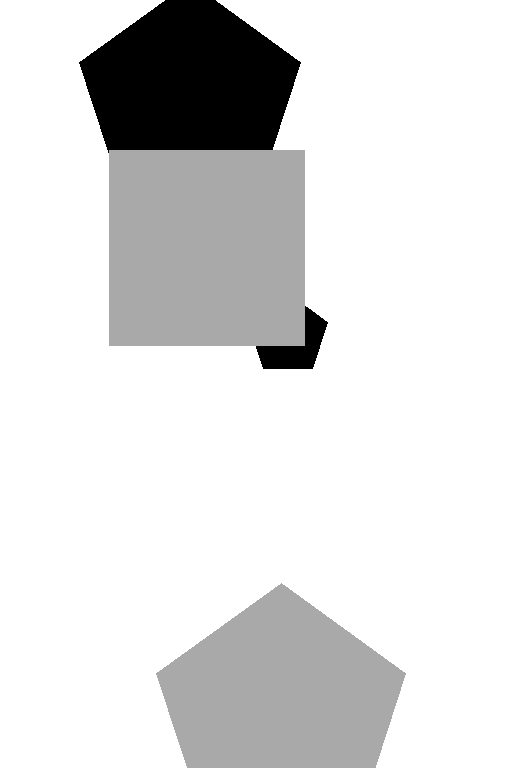

In [8]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder, RandomChoiceArgument
from PIL import Image
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawShapeGeometry(shapes=3, foreground=RandomChoiceArgument(["black", "darkgrey"])) \
            .symmetrize(symmetry=RandomChoiceArgument(["horizontal", "vertical", "rotation", "none"])) \
            .fillBackground(background = "white")

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder
from PIL import Image
from IPython.display import display


pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawShapeGeometry(shapes=3, foreground="black", outline="white", maxsize = 96) \
            .spiralize(steps = 16) \
            .fillBackground(background = "black")

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder, SaturationProcessor, GaussianBlurProcessor, GaussianNoiseProcessor
from PIL import Image
from IPython.display import display


pipeline = ProcessingPipelineBuilder.fromBlank(size=(512, 768)) \
            .drawCheckerboard(background="lightgreen", foreground="magenta", blocksize=(512//3, 768//3), start = "white")
pipeline.addTask(SaturationProcessor(saturation=-0.5))
pipeline.addTask(GaussianNoiseProcessor(sigma=10))
pipeline.addTask(GaussianBlurProcessor(radius=2))
image = pipeline()

display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ProcessingPipelineBuilder, SimpleTransformProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/test.png")

pipeline = ProcessingPipelineBuilder.fromImage(image) \
            .simpleTransform(transform="flipvertical")

image = pipeline()
display(image)


In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, CannyEdgeProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/rabbit.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
geometry.addTask(CannyEdgeProcessor())

image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ImageProcessorPipeline, DepthEstimationProcessor, NormalEstimationProcessor, SegmentationProcessor, 
                         EdgeDetectionProcessor, StraightLineDetectionProcessor, PoseDetectionProcessor, InitImageProcessor )
from PIL import Image
from IPython.display import display

image = Image.open("data/pose.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
# geometry.addTask(DepthEstimationProcessor())
# geometry.addTask(NormalEstimationProcessor())
# geometry.addTask(SegmentationProcessor())
# geometry.addTask(EdgeDetectionProcessor())
# geometry.addTask(StraightLineDetectionProcessor())
geometry.addTask(PoseDetectionProcessor())

image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ProcessingPipelineBuilder, ImageProcessorPipeline, DrawGeometricSpiralProcessor, RandomChoiceArgument, FillBackgroundProcessor )
from PIL import Image
from IPython.display import display

pipeline = (
    ProcessingPipelineBuilder.fromBlank()
            # .fillBackground(background = "black")
            .drawGeometricSpiral(rect=RandomChoiceArgument([(0, 0, 1, 0.5), (0, 0, 0.5, 1)]))
            .symmetrize(symmetry=RandomChoiceArgument(["rotation"]))
            .fillBackground(background = "black")
)

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( ProcessingPipelineBuilder, ImageProcessorPipeline, DrawGeometricSpiralProcessor, RandomChoiceArgument, FillBackgroundProcessor )
from PIL import Image
from IPython.display import display

pipeline = (
    ProcessingPipelineBuilder.fromBlank(size=(512, 768))
                             .drawGeometricSpiral(rect=(0, 0, 1, 0.5), draw=(False, True))
                             .symmetrize(symmetry=RandomChoiceArgument(["rotation", "horizontal"]))
                             .fillBackground(background = "black")
)

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( RandomChoiceArgument, RandomImage, ProcessingPipelineBuilder )
from PIL import Image
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromImage(RandomImage.fromDirectory('/Users/rob/GoogleDrive/stable-diffusion/initimages/oscilloscope')) \
            .simpleTransform(transform = RandomChoiceArgument(["fliphorizontal", "flipvertical", "rotate90", "rotate180", "rotate270", "none"])) \
            .resize(resizetype=RandomChoiceArgument(["stretch", "extend"]), 
                    size=RandomChoiceArgument([(512, 768), (768, 512)]),
                    halign=RandomChoiceArgument(["left", "right", "centre"]), 
                    valign=RandomChoiceArgument(["top", "bottom", "centre"]), fill="black"
            )

image = pipeline()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ( PlaceholderArgument, RandomChoiceArgument, RandomImage, ProcessingPipelineBuilder )
from PIL import Image
from IPython.display import display

pipeline = ProcessingPipelineBuilder.fromImage(PlaceholderArgument("image")) \
            .simpleTransform(transform = RandomChoiceArgument(["fliphorizontal", "flipvertical", "rotate90", "rotate180", "rotate270", "none"])) \
            .resize(resizetype=RandomChoiceArgument(["stretch", "extend", "fit"]), 
                    size=PlaceholderArgument("size"),
                    halign=RandomChoiceArgument(["left", "right", "centre"]), 
                    valign=RandomChoiceArgument(["top", "bottom", "centre"]), fill="black"
            )

pipeline.setPlaceholder("image", RandomImage.fromDirectory('/Users/rob/GoogleDrive/stable-diffusion/initimages/oscilloscope'))
pipeline.setPlaceholder("size", (768, 256))

image = pipeline()
display(image)